In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sn
import statsmodels.formula.api as sm
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant
from statsmodels.distributions.mixture_rvs import mixture_rvs
from statsmodels.nonparametric import kde
pd.set_option('display.max_columns', None)

c:\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import seaborn as sns

In [3]:
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [4]:
df = pd.read_csv('datasets/bmi.csv')
baseline_bmi = df.Bmi.mean()
print(baseline_bmi)

23.226973684210527


In [7]:
df

,weight,height,Bmi,age,gender,status
0,50,125,20,16,female,skinny
1,58,135,21,16,male,skinny
2,63,145,23,18,male,normal
3,68,144,22,18,male,normal
4,70,170,22,18,female,normal
...,...,...,...,...,...,...
299,59,150,20,17,male,normal
300,67,159,23,18,male,normal
301,53,149,19,16,female,normal
302,55,149,19,16,male,normal


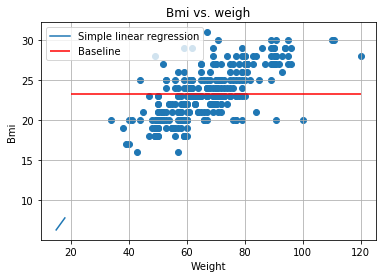

In [11]:
%matplotlib inline

x = np.linspace(15, 18, 10)  # 100 evenly-spaced values from 0 to 50
y = 0.5 * x - 1.25

plt.scatter(df.weight, df.Bmi)
plt.hlines(baseline_bmi, 20, 120, color = 'red', label="Baseline")
plt.plot(x,y, label="Simple linear regression")
plt.legend(loc="upper left")
plt.title("Bmi vs. weigh")
plt.xlabel("Weight")
plt.ylabel("Bmi")
plt.grid()
plt.show()

In [12]:
import statsmodels.graphics.tsaplots as sm_pl

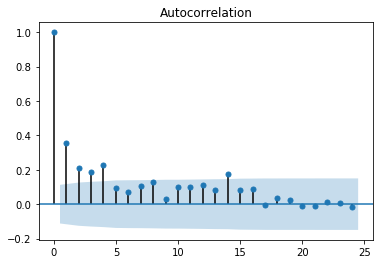

In [13]:
sm_pl.plot_acf(df.Bmi, lags=24);

In [30]:
df

,weight,height,Bmi,age,gender,status
0,50,125,20,16,female,skinny
1,58,135,21,16,male,skinny
2,63,145,23,18,male,normal
3,68,144,22,18,male,normal
4,70,170,22,18,female,normal
...,...,...,...,...,...,...
195,96,167,27,23,female,over-weight
196,60,147,20,24,male,normal
197,66,149,20,14,male,normal
198,76,150,20,18,female,normal


In [14]:
df2 = df.replace({'skinny':'normal'})
df2

,weight,height,Bmi,age,gender,status
0,50,125,20,16,female,normal
1,58,135,21,16,male,normal
2,63,145,23,18,male,normal
3,68,144,22,18,male,normal
4,70,170,22,18,female,normal
...,...,...,...,...,...,...
299,59,150,20,17,male,normal
300,67,159,23,18,male,normal
301,53,149,19,16,female,normal
302,55,149,19,16,male,normal


In [15]:
df2['new_status'] = df2['status'].map({'normal': 0,'over-weight': 1})

In [67]:
df2

,weight,height,Bmi,age,gender,status,new_status
0,50,125,20,16,female,normal,0
1,58,135,21,16,male,normal,0
2,63,145,23,18,male,normal,0
3,68,144,22,18,male,normal,0
4,70,170,22,18,female,normal,0
...,...,...,...,...,...,...,...
195,96,167,27,23,female,over-weight,1
196,60,147,20,24,male,normal,0
197,66,149,20,14,male,normal,0
198,76,150,20,18,female,normal,0


In [16]:
df3 = df2.drop('status',axis='columns')

In [17]:
df3

,weight,height,Bmi,age,gender,new_status
0,50,125,20,16,female,0
1,58,135,21,16,male,0
2,63,145,23,18,male,0
3,68,144,22,18,male,0
4,70,170,22,18,female,0
...,...,...,...,...,...,...
299,59,150,20,17,male,0
300,67,159,23,18,male,0
301,53,149,19,16,female,0
302,55,149,19,16,male,0


In [18]:
formula = formula = 'new_status ~ C(Bmi) + C(gender) + age + weight + height'

In [21]:
df_train = df3.iloc[ 0: 152, : ]
df_test = df3.iloc[ 152: , : ]

In [30]:
df_test.describe()

,weight,height,Bmi,age,new_status
count,152.000000,152.00000,152.000000,152.000000,152.000000
mean,65.664474,157.12500,22.690789,17.921053,0.296053
std,13.447442,12.86883,3.008231,2.328989,0.458024
min,39.000000,120.00000,16.000000,13.000000,0.000000
25%,55.000000,149.00000,20.000000,16.000000,0.000000
50%,62.500000,155.00000,23.000000,18.000000,0.000000
75%,73.000000,165.00000,25.000000,19.000000,1.000000
max,100.000000,198.00000,29.000000,24.000000,1.000000


In [23]:
import patsy
from patsy import dmatrices

y_train,x_train = dmatrices(formula, data=df_train,return_type='dataframe')
y_test,x_test = dmatrices(formula, data=df_test,return_type='dataframe')

In [27]:
model = sm.ols(formula, data = df_train)
res = model.fit()

In [28]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             new_status   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     304.2
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           4.23e-98
Time:                        15:27:26   Log-Likelihood:                 175.90
No. Observations:                 152   AIC:                            -315.8
Df Residuals:                     134   BIC:                            -261.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0533      0.108      0.495      0.622      -0.160       0.267
C(Bmi)[T.19]         -0.0081      0.052     -0.155      0.877      -0.112       0.096
C(Bmi)[T.20]         -0.0112      0.048     -0.232      0.817      -0.107       0.084
C(Bmi)[T.21]         -0.0126      0.047     -0.269      0.788      -0.105       0.080
C(Bmi)[T.22]         -0.0132      0.047     -0.282      0.778      -0.106       0.079
C(Bmi)[T.23]         -0.0107      0.046     -0.231      0.818      -0.102       0.081
C(Bmi)[T.24]         -0.0094      0.048     -0.196      0.845      -0.105       0.086
C(Bmi)[T.25]          0.8876      0.051     17.476      0.000       0.787       0.988
C(Bmi)[T.26]          0.9827      0.060     16.368      0.000       0.864       1.101
C(Bmi)[T.27]          0.9956      0.048     20.797      0.000       0.901       1.090
C(Bmi)[T.28]          0.9952      0.052     18.991      0.000       0.892       1.099
C(Bmi)[T.29]          0.9951      0.051     19.354      0.000       0.893       1.097
C(Bmi)[T.30]          0.9988      0.060     16.730      0.000       0.881       1.117
C(Bmi)[T.31]          1.0101      0.091     11.048      0.000       0.829       1.191
C(gender)[T.male]     0.0134      0.014      0.927      0.356      -0.015       0.042
age                   0.0015      0.003      0.454      0.651      -0.005       0.008
weight                0.0005      0.001      0.595      0.553      -0.001       0.002
height               -0.0007      0.001     -1.356      0.177      -0.002       0.000
==============================================================================
Omnibus:                      300.277   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85904.033
Skew:                         -10.036   Prob(JB):                         0.00
Kurtosis:                     117.721   Cond. No.                     4.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Distribution of our Predictions')

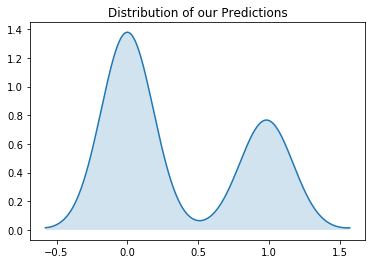

In [31]:
from statsmodels.distributions.mixture_rvs import mixture_rvs
from statsmodels.nonparametric import kde

kde_res = kde.KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=0.2)
plt.title("Distribution of our Predictions")

In [138]:
plt.scatter(res.predict(),x_train['C(gender)'], alpha=0.2)
plt.xlabel("Predicted Bmi")
plt.ylabel("Class bool") # Boolean class to show if its 3rd class
plt.grid(b=True, which='major', axis='x')
plt.title("Bmi predict")

KeyError: 'C(gender)'

In [8]:
df['height'].mean()

155.015

In [9]:
import scipy.stats as stats
xbar = np.mean(df.height) # sample mean
mu0 = 175 # hypothesized value
s = np.std(df.height, ddof=1) # sample standard deviation
n = len(df.height) # sample size
print(xbar)
tobs = (xbar - mu0) / (s / np.sqrt(n))
print(tobs)

155.03517587939697
-15.939125829905896


In [11]:
cor, pval = stats.pearsonr(df.weight, df.height)
print(cor, pval)

0.6720860559370654 1.6498476422328187e-27


In [26]:
grp = np.array(["M"] * 100 + ["F"] * 100)
print(stats.ttest_ind(df.Bmi[grp == "M"], df.Bmi[grp == "F"], equal_var=True))

Ttest_indResult(statistic=3.099454740471956, pvalue=0.0022210152265837784)


Non-Parametric Spearman cor test, cor: 0.6581, pval: 0.0000
Parametric Pearson cor test: cor: 0.6551, pval: 0.0000


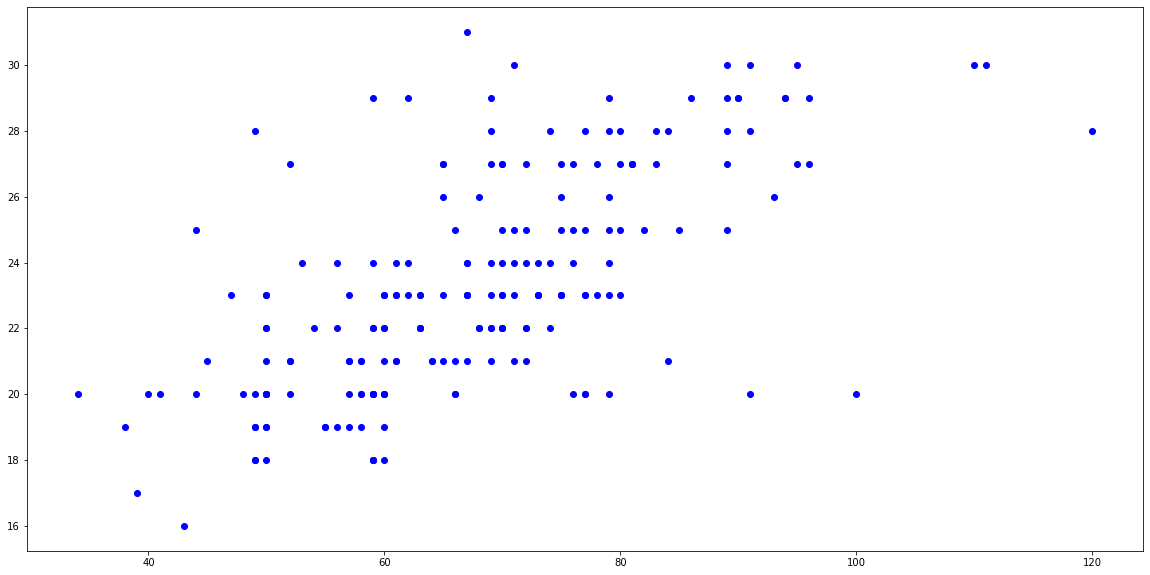

In [28]:
plt.plot(df.weight, df.Bmi, "bo")
# Non-Parametric Spearman
cor, pval = stats.spearmanr(df.weight, df.Bmi)
print("Non-Parametric Spearman cor test, cor: %.4f, pval: %.4f" % (cor, pval))
# "Parametric Pearson cor test
cor, pval = stats.pearsonr(df.weight, df.Bmi)
print("Parametric Pearson cor test: cor: %.4f, pval: %.4f" % (cor, pval))

In [32]:
df['Bmi'].kurt()

-0.7711726160500461

In [39]:
excess_kurt = df.kurt() - 3

In [40]:
excess_kurt

weight   -2.412352
height   -3.389494
Bmi      -3.771173
age      -2.056479
dtype: float64

In [38]:
df.kurt()

weight    0.587648
height   -0.389494
Bmi      -0.771173
age       0.943521
dtype: float64

In [42]:
df.skew(axis = 0, skipna = True)

weight    0.499466
height    0.171509
Bmi       0.365525
age       0.628446
dtype: float64

In [12]:
df.stack()

0    weight        50
     height       125
     Bmi           20
     age           16
     gender    female
                ...  
199  height       151
     Bmi           23
     age           19
     gender      male
     status    normal
Length: 1200, dtype: object

In [11]:
bins = [15,20,25,30]

In [16]:
ban = pd.cut(df.Bmi, bins)

ban.head()

0    (15, 20]
1    (20, 25]
2    (20, 25]
3    (20, 25]
4    (20, 25]
Name: Bmi, dtype: category
Categories (3, interval[int64]): [(15, 20] < (20, 25] < (25, 30]]

In [21]:
col = df.height
col[np.abs(col) > 170]

6      171
9      175
11     171
61     180
62     179
83     172
100    172
101    171
104    172
105    180
107    171
108    190
109    190
110    191
113    180
115    175
116    180
119    173
120    185
121    195
122    198
124    198
125    190
131    185
137    172
138    190
139    173
140    177
141    174
143    180
144    181
145    172
146    172
155    190
161    180
177    176
190    198
Name: height, dtype: int64

1
normal


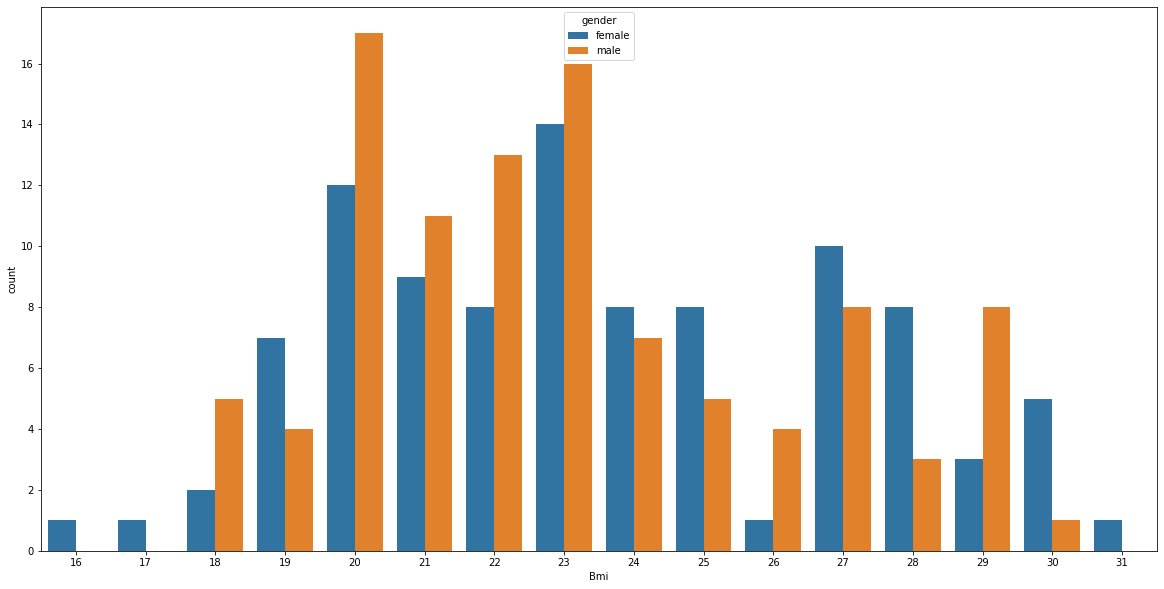

In [25]:
sns.countplot(x='Bmi', hue='gender', data=df);

Bmi = int(input())
if Bmi >= 25:
    print('overweight')
elif Bmi <= 25:
    print('normal')
else:
    print('skinny')


In [ ]:
plt.bar(df['age'],df['weight'], color='red')
plt.legend('height vs Bmi')
plt.ylabel('height (cm)')
plt.xlabel('Bmi status')
plt.show()

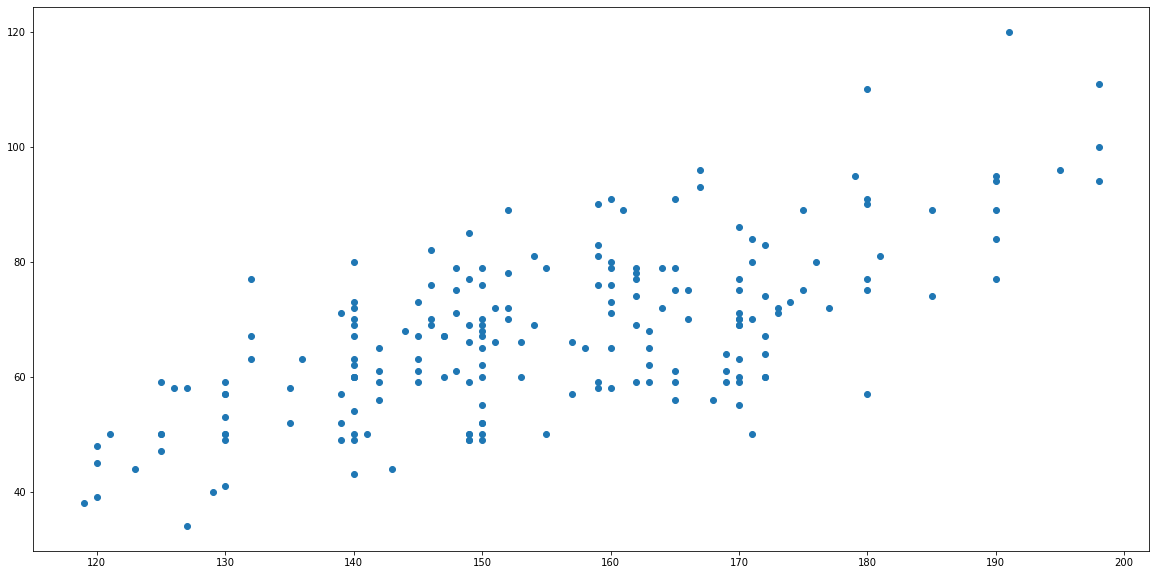

In [36]:
plt.scatter(df['height'],df['weight'])

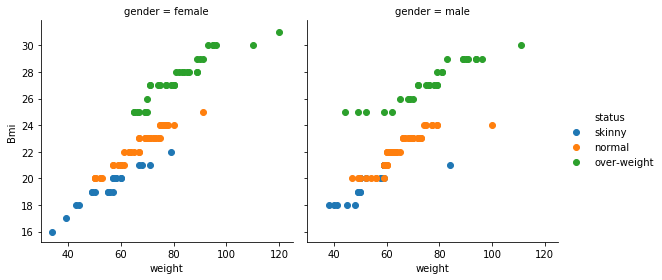

In [14]:
from scipy import stats
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(df, hue="status", col="gender", height=4)
g.map(qqplot, "weight", "Bmi")
g.add_legend();

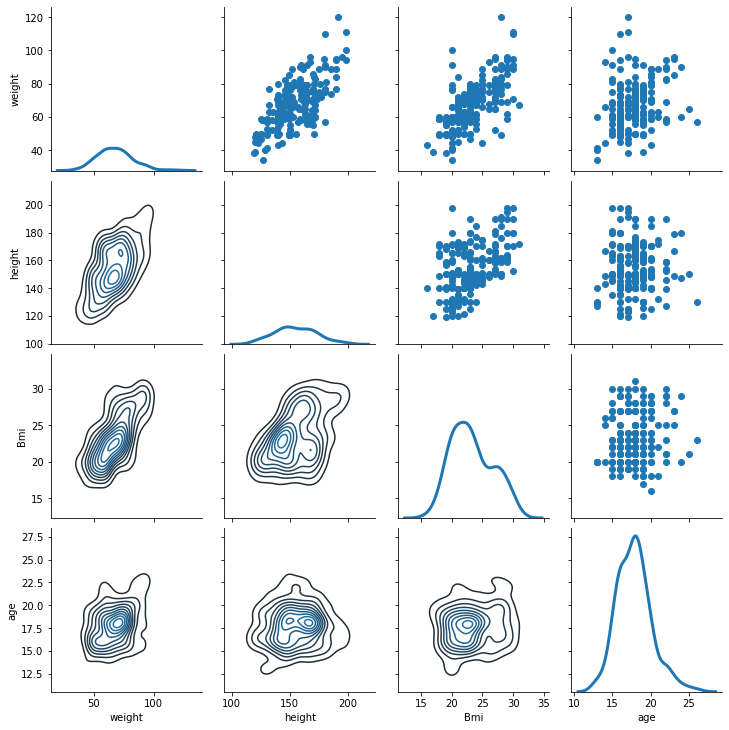

In [18]:
g = sns.PairGrid(df)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);

In [15]:
df.corr()

,weight,height,Bmi,age
weight,1.000000,0.672086,0.655259,0.238429
height,0.672086,1.000000,0.471110,0.054459
Bmi,0.655259,0.471110,1.000000,0.127030
age,0.238429,0.054459,0.127030,1.000000


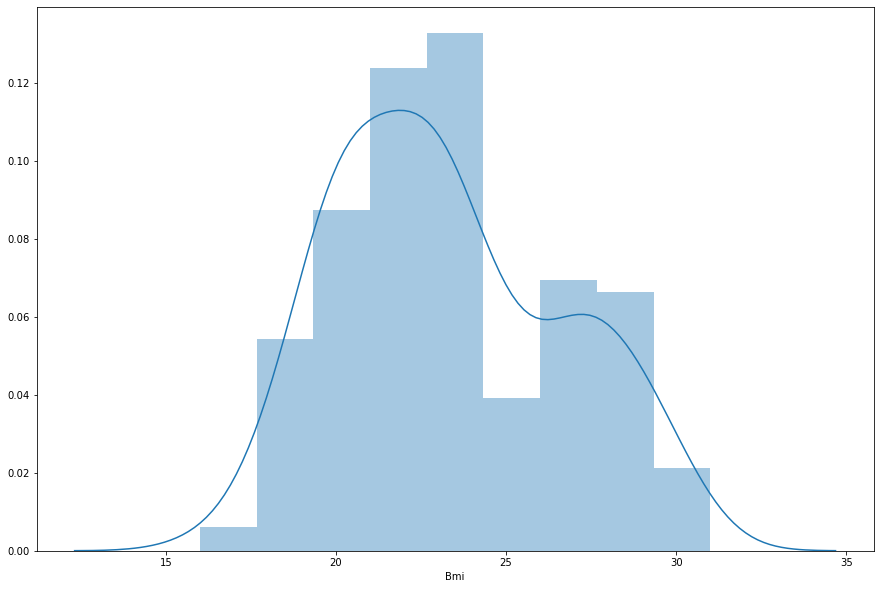

In [37]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sn.distplot(df['Bmi'])

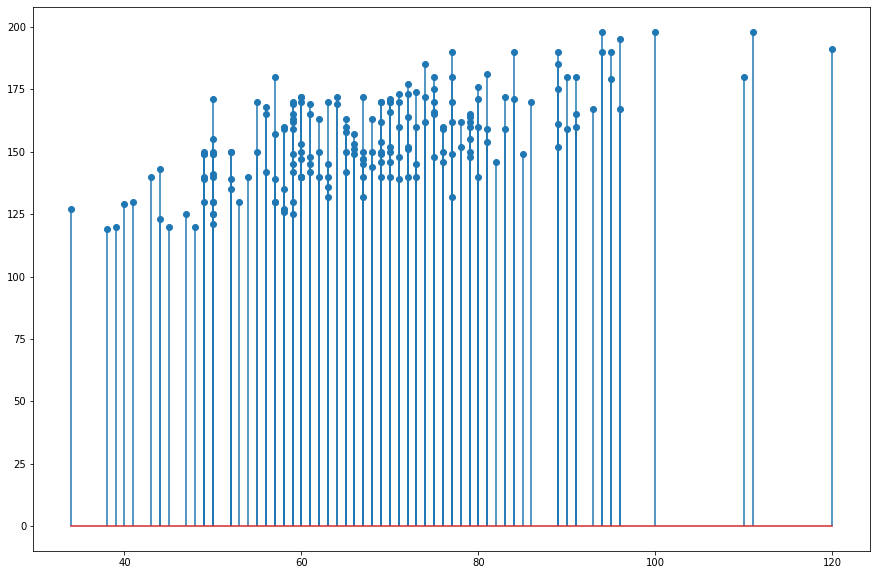

In [43]:

x = df.weight
y = df.height

plt.stem(x, y, use_line_collection=True)
plt.show()

In [35]:
df['height'].std()

17.669632936919655

In [ ]:
df.shape

In [ ]:
plt.scatter(df['Weight'],df['Height'])


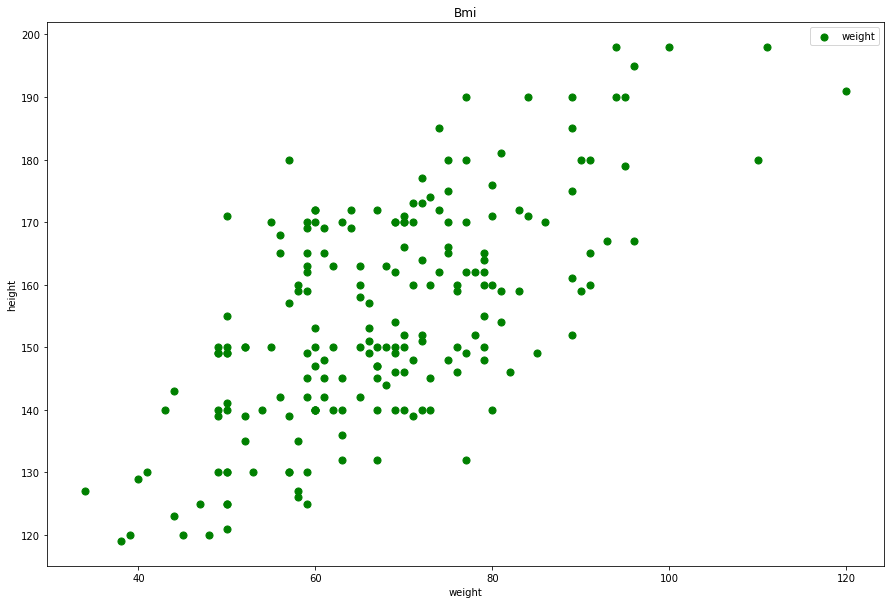

In [39]:
matplotlib.rcParams['figure.figsize'] = (15,10)
plt.scatter(df.weight,df.height,color='green',label='weight', s=50)
plt.xlabel("weight")
plt.ylabel("height")
plt.title('Bmi')
plt.legend()

In [38]:
df.head()

,weight,height,Bmi,age,gender,status
0,50,125,20,16,female,skinny
1,58,135,21,16,male,skinny
2,63,145,23,18,male,normal
3,68,144,22,18,male,normal
4,70,170,22,18,female,normal


In [39]:
df.describe()

,weight,height,Bmi,age
count,199.000000,199.000000,199.000000,199.000000
mean,67.638191,155.035176,23.296482,17.879397
std,14.467649,17.669633,3.340528,2.250820
min,34.000000,119.000000,16.000000,13.000000
25%,58.500000,142.000000,21.000000,16.000000
50%,67.000000,152.000000,23.000000,18.000000
75%,76.500000,169.000000,26.000000,19.000000
max,120.000000,198.000000,31.000000,26.000000


In [19]:
df.columns

Index(['weight', 'height', 'Bmi', 'age', 'gender', 'status'], dtype='object')

In [40]:
dummies = pd.get_dummies(df.gender)
dummies

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
194,1,0
195,1,0
196,0,1
197,0,1


In [41]:
dummies1 = pd.get_dummies(df.status)
dummies1

,normal,over-weight,skinny
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
194,1,0,0
195,0,1,0
196,1,0,0
197,1,0,0


In [42]:
df1 = pd.concat([df,dummies,dummies1],axis='columns')

In [43]:
df1.head(30)

,weight,height,Bmi,age,gender,status,female,male,normal,over-weight,skinny
0,50,125,20,16,female,skinny,1,0,0,0,1
1,58,135,21,16,male,skinny,0,1,0,0,1
2,63,145,23,18,male,normal,0,1,1,0,0
3,68,144,22,18,male,normal,0,1,1,0,0
4,70,170,22,18,female,normal,1,0,1,0,0
5,79,165,20,18,female,skinny,1,0,0,0,1
6,84,171,21,18,male,skinny,0,1,0,0,1
7,75,166,23,18,female,normal,1,0,1,0,0
8,65,160,26,15,male,over-weight,0,1,0,1,0
9,89,175,25,21,female,over-weight,1,0,0,1,0


In [44]:
df2 = df1.drop(['gender','status'],axis='columns')

In [45]:
df2.head()

,weight,height,Bmi,age,female,male,normal,over-weight,skinny
0,50,125,20,16,1,0,0,0,1
1,58,135,21,16,0,1,0,0,1
2,63,145,23,18,0,1,1,0,0
3,68,144,22,18,0,1,1,0,0
4,70,170,22,18,1,0,1,0,0


In [99]:
df3 = pd.concat([df2,dummies],axis='columns')
df3

,weight,height,Bmi,age,female,male,normal,over-weight,skinny,female,male
0,50,125,20,16,1,0,0,0,1,1,0
1,58,135,21,16,0,1,0,0,1,0,1
2,63,145,23,18,0,1,1,0,0,0,1
3,68,144,22,18,0,1,1,0,0,0,1
4,70,170,22,18,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
194,59,142,20,16,1,0,1,0,0,1,0
195,96,167,27,23,1,0,0,1,0,1,0
196,60,147,20,24,0,1,1,0,0,0,1
197,66,149,20,14,0,1,1,0,0,0,1


In [15]:
df4.head()

NameError: name 'df4' is not defined

In [100]:
X = df3.drop(['Bmi'],axis='columns')

In [101]:
y = df3.Bmi

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [107]:
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
lr_clf = LinearRegression()

lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8402623640938425

In [108]:
lr_clf.predict(X_train)

array([22.93261697, 22.58527946, 19.16251147, 22.58913821, 22.19196149,
       19.18647164, 18.99554898, 22.55907533, 19.38231945, 21.93759333,
       26.99170629, 22.39009628, 19.30833798, 19.48135606, 22.06749062,
       19.57324211, 27.46264874, 27.22057616, 22.01831424, 22.60906116,
       27.5388387 , 27.90937406, 27.36537174, 19.42368818, 27.63819286,
       22.00425906, 27.81151091, 23.00598848, 21.98286794, 27.24835207,
       22.30265514, 22.23664995, 27.84328283, 19.64525577, 27.04949796,
       22.63517515, 27.24215921, 22.29677572, 22.67869771, 19.56736268,
       26.87894714, 27.17507825, 19.0417662 , 22.11796836, 27.47736856,
       19.88733016, 19.10745566, 22.63867335, 27.4037813 , 19.65360245,
       22.05276736, 21.94445838, 26.81025139, 27.16216697, 21.98676036,
       22.21098484, 22.13165543, 22.35074411, 22.34344183, 27.49827531,
       22.23987017, 27.27918664, 22.27262591, 22.41312321, 21.97479168,
       22.62050246, 26.43222182, 22.48405356, 21.88873039, 22.23

In [109]:
y_pred = lr_clf.predict(X_test)

In [111]:
df2=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df2.head(15)

,Actual,Predicted
59,26,27.227094
5,20,20.148203
20,23,21.944458
124,30,28.053327
52,21,19.786237
19,21,19.243905
161,20,22.240768
55,23,22.118778
69,27,27.064843
2,23,22.025179


In [112]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
59,26,27.227094
5,20,20.148203
20,23,21.944458
124,30,28.053327
52,21,19.786237
19,21,19.243905
161,20,22.240768
55,23,22.118778
69,27,27.064843
2,23,22.025179


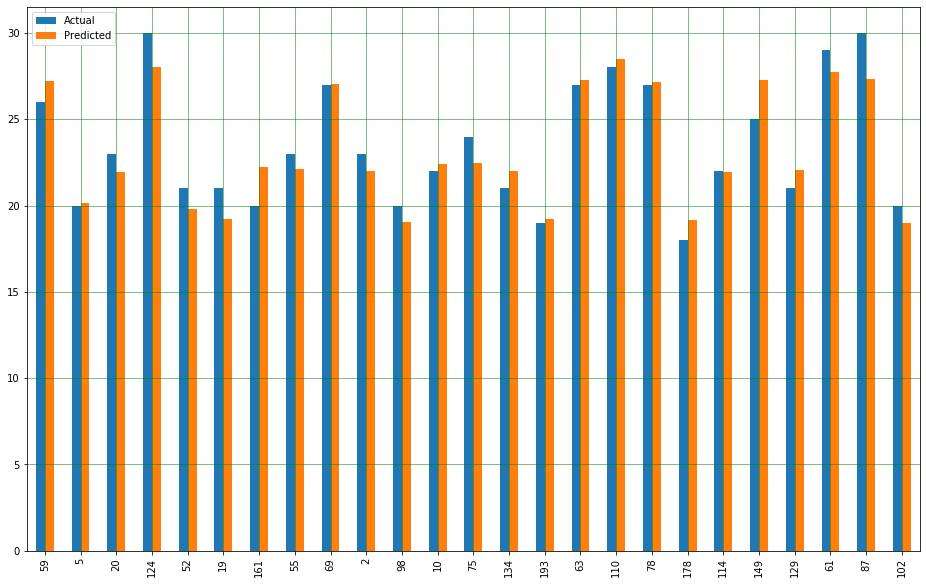

In [113]:
df3 = df2.head(25)
df3.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [130]:
Xr_test = X_test.drop(['height', 'age', 'female', 'male', 'normal', 'over-weight',
       'skinny', 'female', 'male'],axis='columns')

In [129]:
X_test.shape

(40, 10)

In [140]:
plt.scatter(X_test[:,:-1], y_test,  color='gray')
plt.plot(X_test[:,:-1], y_pred, color='red', linewidth=2)
plt.show()

TypeError: '(slice(None, None, None), slice(None, -1, None))' is an invalid key

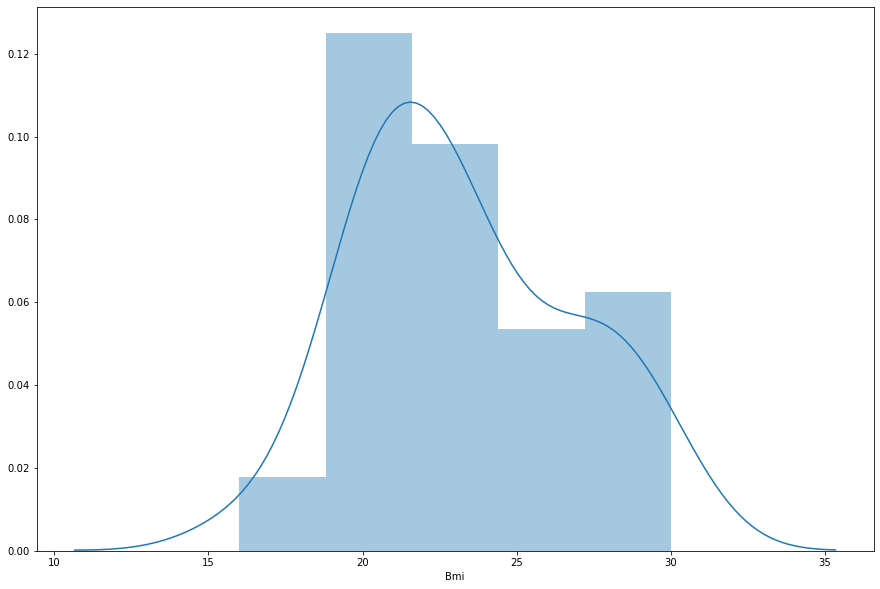

In [134]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sn.distplot(y_test)

In [71]:
X_test.shape

(40, 8)

In [27]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.1624964276132583
Mean Squared Error: 1.9264358890282582
Root Mean Squared Error: 1.387961054579075


In [29]:
lr_clf.normalize

False

In [74]:
lr_clf.n_classes_

AttributeError: 'LinearRegression' object has no attribute 'n_classes_'

In [75]:
print(y_pred)

[27.22709411 20.1482028  21.94445838 28.05332653 19.78623742 19.24390456
 22.24076795 22.11877781 27.06484284 22.02517928 19.06746496 22.4050806
 22.4398117  21.98976665 19.21061209 27.28981094 28.46356116 27.18491593
 19.17000568 21.94333549 27.29366969 22.03774347 27.74721705 27.31996397
 18.9706462  27.5212162  19.2772348  19.37151487 27.54830827 22.10890648
 22.36954417 19.25933022 21.99269215 21.96724099 22.37700472 27.71586035
 27.49362058 22.29528473 19.32485287 22.40275061]


In [76]:
lr_clf.predict(X_train)

array([22.93261697, 22.58527946, 19.16251147, 22.58913821, 22.19196149,
       19.18647164, 18.99554898, 22.55907533, 19.38231945, 21.93759333,
       26.99170629, 22.39009628, 19.30833798, 19.48135606, 22.06749062,
       19.57324211, 27.46264874, 27.22057616, 22.01831424, 22.60906116,
       27.5388387 , 27.90937406, 27.36537174, 19.42368818, 27.63819286,
       22.00425906, 27.81151091, 23.00598848, 21.98286794, 27.24835207,
       22.30265514, 22.23664995, 27.84328283, 19.64525577, 27.04949796,
       22.63517515, 27.24215921, 22.29677572, 22.67869771, 19.56736268,
       26.87894714, 27.17507825, 19.0417662 , 22.11796836, 27.47736856,
       19.88733016, 19.10745566, 22.63867335, 27.4037813 , 19.65360245,
       22.05276736, 21.94445838, 26.81025139, 27.16216697, 21.98676036,
       22.21098484, 22.13165543, 22.35074411, 22.34344183, 27.49827531,
       22.23987017, 27.27918664, 22.27262591, 22.41312321, 21.97479168,
       22.62050246, 26.43222182, 22.48405356, 21.88873039, 22.23

In [77]:
y_train

189    20
7      23
26     19
148    24
58     23
       ..
113    30
64     26
15     23
125    28
9      25
Name: Bmi, Length: 159, dtype: int64

In [79]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

cross_val_score(LinearRegression(), X,y,cv=cv)

array([0.84026236, 0.79362132, 0.83712208, 0.78930523, 0.83685915])

In [80]:
from sklearn import preprocessing, svm

In [81]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [82]:
model_params = {
    'svm' : {
        'model' : svm.SVC(gamma='auto'),
        'params' : {
            'C' : [1,10,20],
            'kernel' : ['rbf', 'linear']
        }
    },
    'radom_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,5,10]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
        'params' : {
            'C' : [1,5,10]
        }
    },
    'Gaussian_nb' : {
        'model' : GaussianNB(),
        'params' : {}
    },
    'multinominal_nb' : {
        'model' : MultinomialNB(),
        'params' : {}
    },
    'decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini','entropy'],
        }
    },
    'linear_regression' : {
        'model' : LinearRegression(),
        'params' : {
            'normalize' : [True, False]
        }
    }
}

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
scores = []
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

c:\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_sp

In [86]:
scores

[{'model': 'svm',
  'best_score': 0.2701612903225806,
  'best_params': {'C': 10, 'kernel': 'linear'}},
 {'model': 'radom_forest',
  'best_score': 0.2881048387096774,
  'best_params': {'n_estimators': 10}},
 {'model': 'logistic_regression',
  'best_score': 0.26411290322580644,
  'best_params': {'C': 1}},
 {'model': 'Gaussian_nb',
  'best_score': 0.22641129032258064,
  'best_params': {}},
 {'model': 'multinominal_nb',
  'best_score': 0.26411290322580644,
  'best_params': {}},
 {'model': 'decision_tree',
  'best_score': 0.29536290322580644,
  'best_params': {'criterion': 'gini'}},
 {'model': 'linear_regression',
  'best_score': 0.8086524236312169,
  'best_params': {'normalize': True}}]

In [85]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.270161,"{'C': 10, 'kernel': 'linear'}"
1,radom_forest,0.288105,{'n_estimators': 10}
2,logistic_regression,0.264113,{'C': 1}
3,Gaussian_nb,0.226411,{}
4,multinominal_nb,0.264113,{}
5,decision_tree,0.295363,{'criterion': 'gini'}
6,linear_regression,0.808652,{'normalize': True}


In [87]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random','cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=20)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.787578,{'normalize': False}
1,lasso,0.318319,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.661061,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [95]:
def predict_bmi(weight,height,male,female):
     
    x[0] = weight
    x[1] = height
    x[2] = male
    x[3] = female
            
    return lr_clf.predict([x])

In [96]:
predict_bmi(167,89,1,0)

NameError: name 'x' is not defined

In [48]:
import pickle
with open('men_height_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [49]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
lr_clf = LinearRegression(n_jobs=-1)